In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.svm import SVC,LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler,LabelEncoder

In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')

In [8]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

#This dataset contains red and white variance of portuguese wine.Here 'Quality'of win is the target 
variant which contain two catagories so it is a 'classification problem' where we need to preidct the quality of wine
using classification model

In [9]:
df.head(15)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7             0.580         0.08             1.8      0.097   
11            7.5             0.500         0.36             6.1      0.071   
12            5.6             0.615         0.00             1.6      0.089   
13            7.8             0.610         0.29             1.6      0.114   
14            8.9             0.620         0.18             3.8      0.176   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   
11                 17.0                 102.0   0.9978  3.35       0.80   
12                 16.0                  59.0   0.9943  3.58       0.52   
13                  9.0                  29.0   0.9974  3.26       1.56   
14                 52.0                 145.0   0.9986  3.16       0.88   

    alcohol  quality  
0       9.4        5  
1       9.8        5  
2       9.8        5  
3       9.8        6  
4       9.4        5  
5       9.4        5  
6       9.4        5  
7      10.0        7  
8       9.5        7  
9      10.5        5  
10      9.2        5  
11     10.5        5  
12      9.9        5  
13      9.1        5  
14      9.2        5

#This are first 14 columns of the data

In [10]:
df.sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
389             9.6             0.380         0.31             2.5      0.096   
1446            6.9             0.630         0.02             1.9      0.078   
66              7.5             0.520         0.11             1.5      0.079   
181             8.9             0.610         0.49             2.0      0.270   
2               7.8             0.760         0.04             2.3      0.092   
133             6.6             0.500         0.01             1.5      0.060   
1242            9.0             0.400         0.41             2.0      0.058   
472            12.5             0.370         0.55             2.6      0.083   
1567            7.2             0.695         0.13             2.0      0.076   
960             8.5             0.470         0.27             1.9      0.058   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
389                  16.0                  49.0  0.99820  3.19       0.70   
1446                 18.0                  30.0  0.99712  3.40       0.75   
66                   11.0                  39.0  0.99680  3.42       0.58   
181                  23.0                 110.0  0.99720  3.12       1.02   
2                    15.0                  54.0  0.99700  3.26       0.65   
133                  17.0                  26.0  0.99520  3.40       0.58   
1242                 15.0                  40.0  0.99414  3.22       0.60   
472                  25.0                  68.0  0.99950  3.15       0.82   
1567                 12.0                  20.0  0.99546  3.29       0.54   
960                  18.0                  38.0  0.99518  3.16       0.85   

      alcohol  quality  
389      10.0        7  
1446      9.8        5  
66        9.6        5  
181       9.3        5  
2         9.8        5  
133       9.8        6  
1242     12.2        6  
472      10.4        6  
1567     10.1        5  
960      11.1        6

#This is the random selection of 10 rows and columns from the given dataset

In [11]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

#In this data we can see that the column 'quality' has 6 type of wine quality rating/unique values and the total count of each value is mention.The dtype is int64. The quality has most values concentrated in categories 5,6 and 7.

In [12]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

#This are all the name of the 12 columns of the given dataset

In [13]:
df.shape

(1599, 12)

This dataset contains 1599 rows and 12 coloumns out of which one is our target variable and rest are independent variables

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#In this we can see the total number of rows and there is no null values. All the 11 columns are float64 dtype as the columns contains decimal values and there is only one int64, that is the 'quality' column which has no decimal value.

In [15]:
df.nunique().to_frame('No of unique values')

No of unique values
fixed acidity                          96
volatile acidity                      143
citric acid                            80
residual sugar                         91
chlorides                             153
free sulfur dioxide                    60
total sulfur dioxide                  144
density                               436
pH                                     89
sulphates                              96
alcohol                                65
quality                                 6

#This are the unique values present in the dataset.

In [16]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

#This shows the statistical information of the numericalcolumns. It has no negative values
from the above abservation we can say that-
1. The count of all columns are same as there is no missing values.
2. The mean value is greater than median(50%) in most of the columns, which means data is skewed to the right.
3. There is huge difference between the max and 75% so there are outliers present in the data.
4. The standard deviation,25% percentile value and min can be notice by this describe method.

<Axes: >

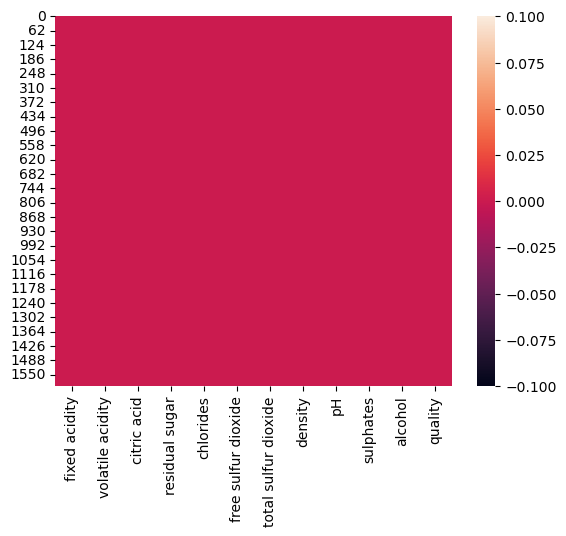

In [17]:
sns.heatmap(df.isnull())

#This shows that there is no missing value in the dataset

<Axes: >

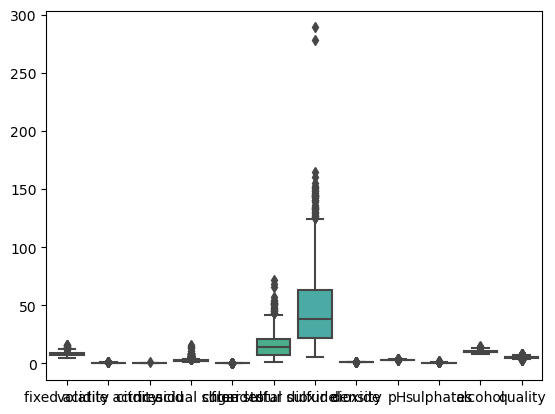

In [18]:
#dropping of duplicates values
df.drop_duplicates(inplace=True)
sns.boxplot(df)

In [19]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
5         9.4        5  
...       ...      ...  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  
1598     11.0        6  

[1359 rows x 12 columns]

This is after dropping of duplicates, we can see there are now 1359 rows and 12 columns. Before it was 1599 rows.

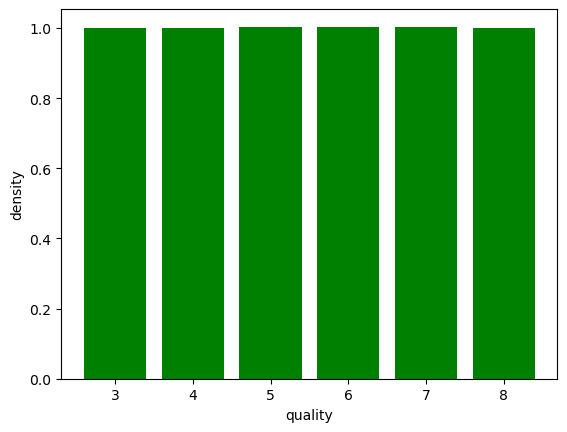

In [20]:
plt.bar(df['quality'], df['density'],color='green')
plt.xlabel('quality')
plt.ylabel('density')
plt.show()

The density of wine are nearly same so it can not be used for discriminating the wine quality

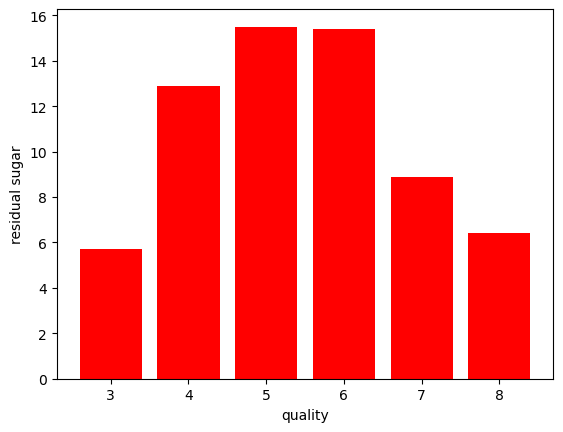

In [21]:
plt.bar(df['quality'], df['residual sugar'],color='red')
plt.xlabel('quality')
plt.ylabel('residual sugar')
plt.show()


It is noticed that lower the residual sugar there is increase in the quality.But it is not able to clearly discriminate the wine quality.

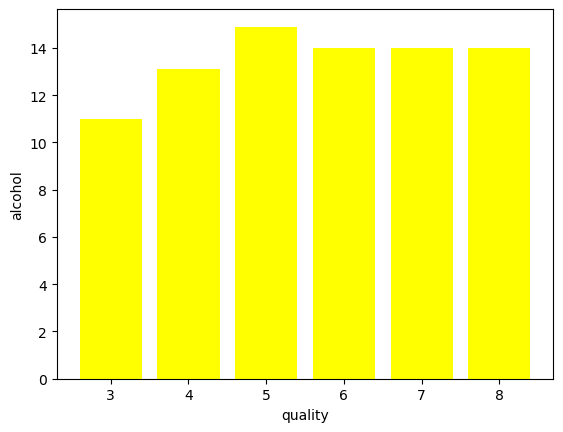

In [22]:
plt.bar(df['quality'], df['alcohol'],color='yellow')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

As we can notice that if the ratio of alcohol is higher orr lower than 14 the quality of wine become bad

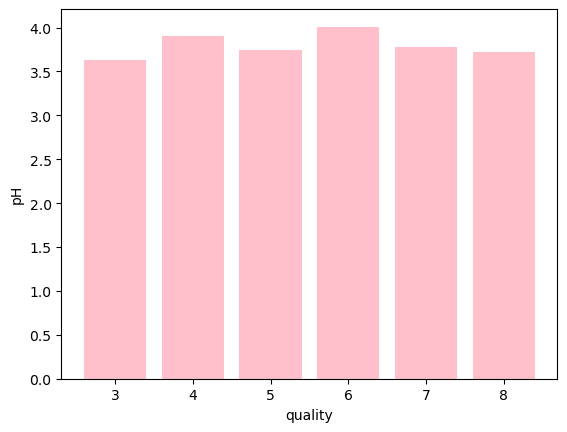

In [23]:
plt.bar(df['quality'], df['pH'],color='pink')
plt.xlabel('quality')
plt.ylabel('pH')
plt.show()

ph is also almost same so it is unable to discriminate wine quality.

<Axes: xlabel='quality', ylabel='citric acid'>

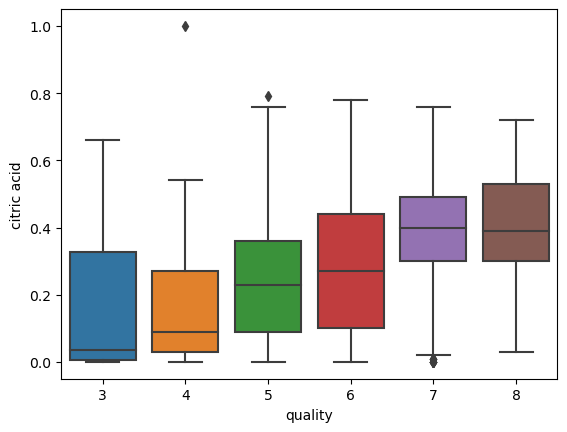

In [24]:
sns.boxplot(x='quality',y='citric acid',data=df)

We can see the presence of outliers through boxplot in the 'qualit' and 'citric acid' column.

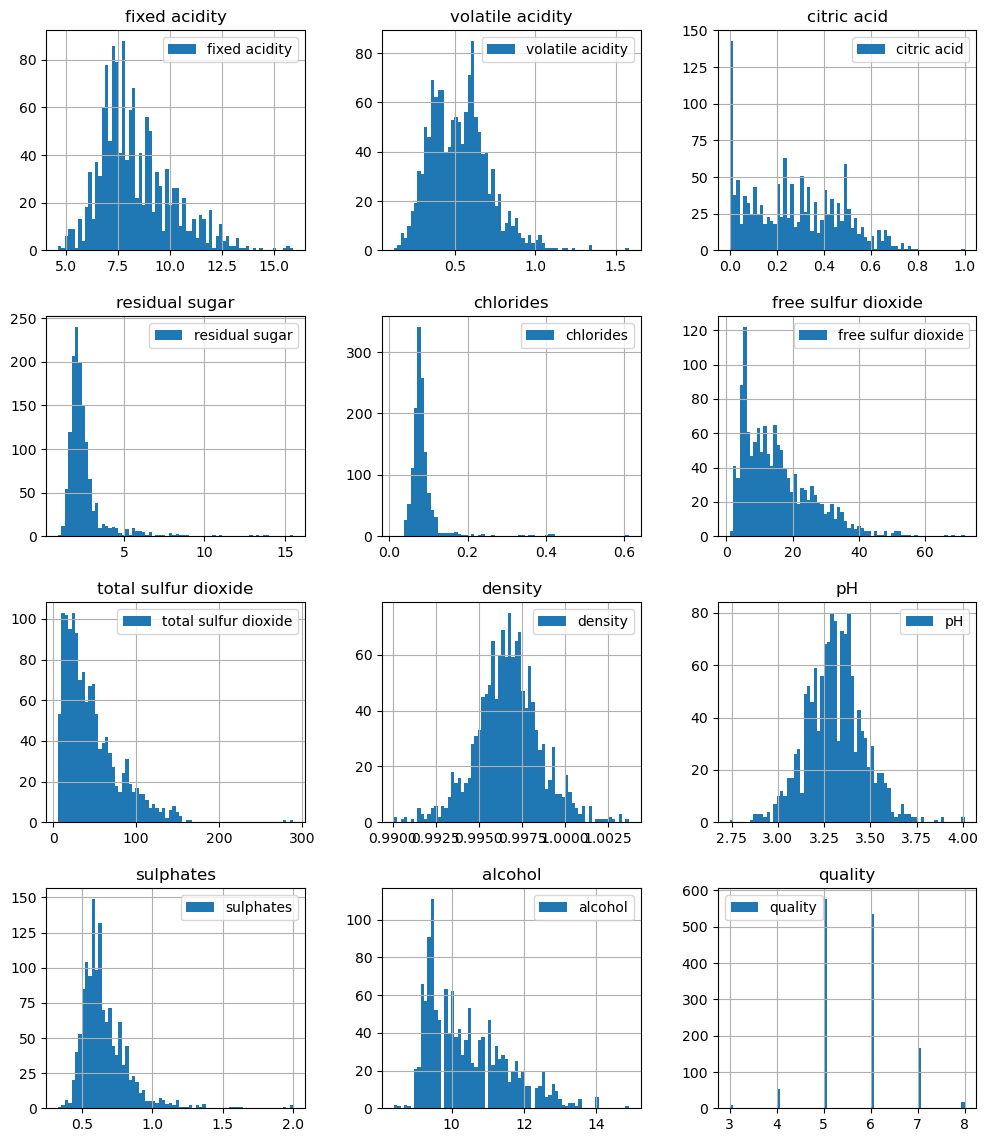

In [25]:
df.hist(bins=70, figsize=(12,14),legend=True)
plt.show()

#It shows that most fig has right skewness i.e positive skewness
columns 'density','pH' and 'quality' has normal distribution

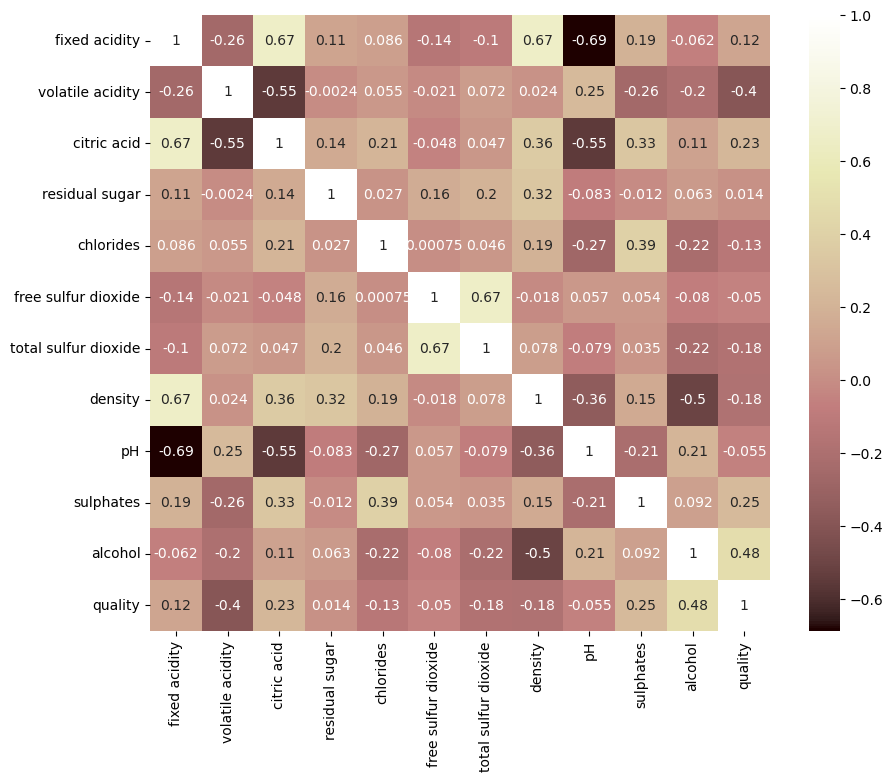

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='pink',annot=True)
plt.show()

#the light shades shows the positive correlation and dark shade shows negative correlation.

 1.pH has strong negative correlation with fixed acidity.
 2. where as 'total sulfur dioxide and 'free sulfur dioxide is positively correlated
 3.'citric acid' and 'fixed acidity' has positive correlation
 4.'density' has positive correlation with 'residual sugar' and it has negative correlation with 'alcohol' 
     it is better to drop pH column as it is highly negatively correlated

In [27]:
bins=(2,6.5,8)
group=['Bad','Good']

df['quality']=pd.cut(df['quality'],bins=bins,labels=group)

label_quality=LabelEncoder()

df['quality']=label_quality.fit_transform(df['quality'])

In [28]:
df['quality'].value_counts()

0    1175
1     184
Name: quality, dtype: int64

This are the value count of good and bad quality wine. 1175 bad quality wine and 184 good quality wine

In [29]:
for a in range(len(df.corr().columns)):
     for b in range(a):
        if abs(df.corr().iloc[a,b])>0.7:
            name=df.corr().columns[a]
            print(name)

In [30]:
#to drop pH column
df.drop(['pH'],axis=1,inplace=True)

In [31]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density  sulphates  alcohol  \
0                    11.0                  34.0  0.99780       0.56      9.4   
1                    25.0                  67.0  0.99680       0.68      9.8   
2                    15.0                  54.0  0.99700       0.65      9.8   
3                    17.0                  60.0  0.99800       0.58      9.8   
5                    13.0                  40.0  0.99780       0.56      9.4   
...                   ...                   ...      ...        ...      ...   
1593                 28.0                  38.0  0.99651       0.82      9.5   
1594                 32.0                  44.0  0.99490       0.58     10.5   
1595                 39.0                  51.0  0.99512       0.76     11.2   
1597                 32.0                  44.0  0.99547       0.71     10.2   
1598                 18.0                  42.0  0.99549       0.66     11.0   

      quality  
0           0  
1           0  
2           0  
3           0  
5           0  
...       ...  
1593        0  
1594        0  
1595        0  
1597        0  
1598        0  

[1359 rows x 11 columns]

Here we can see that total sulfur dioxide and ph column has been dropped.

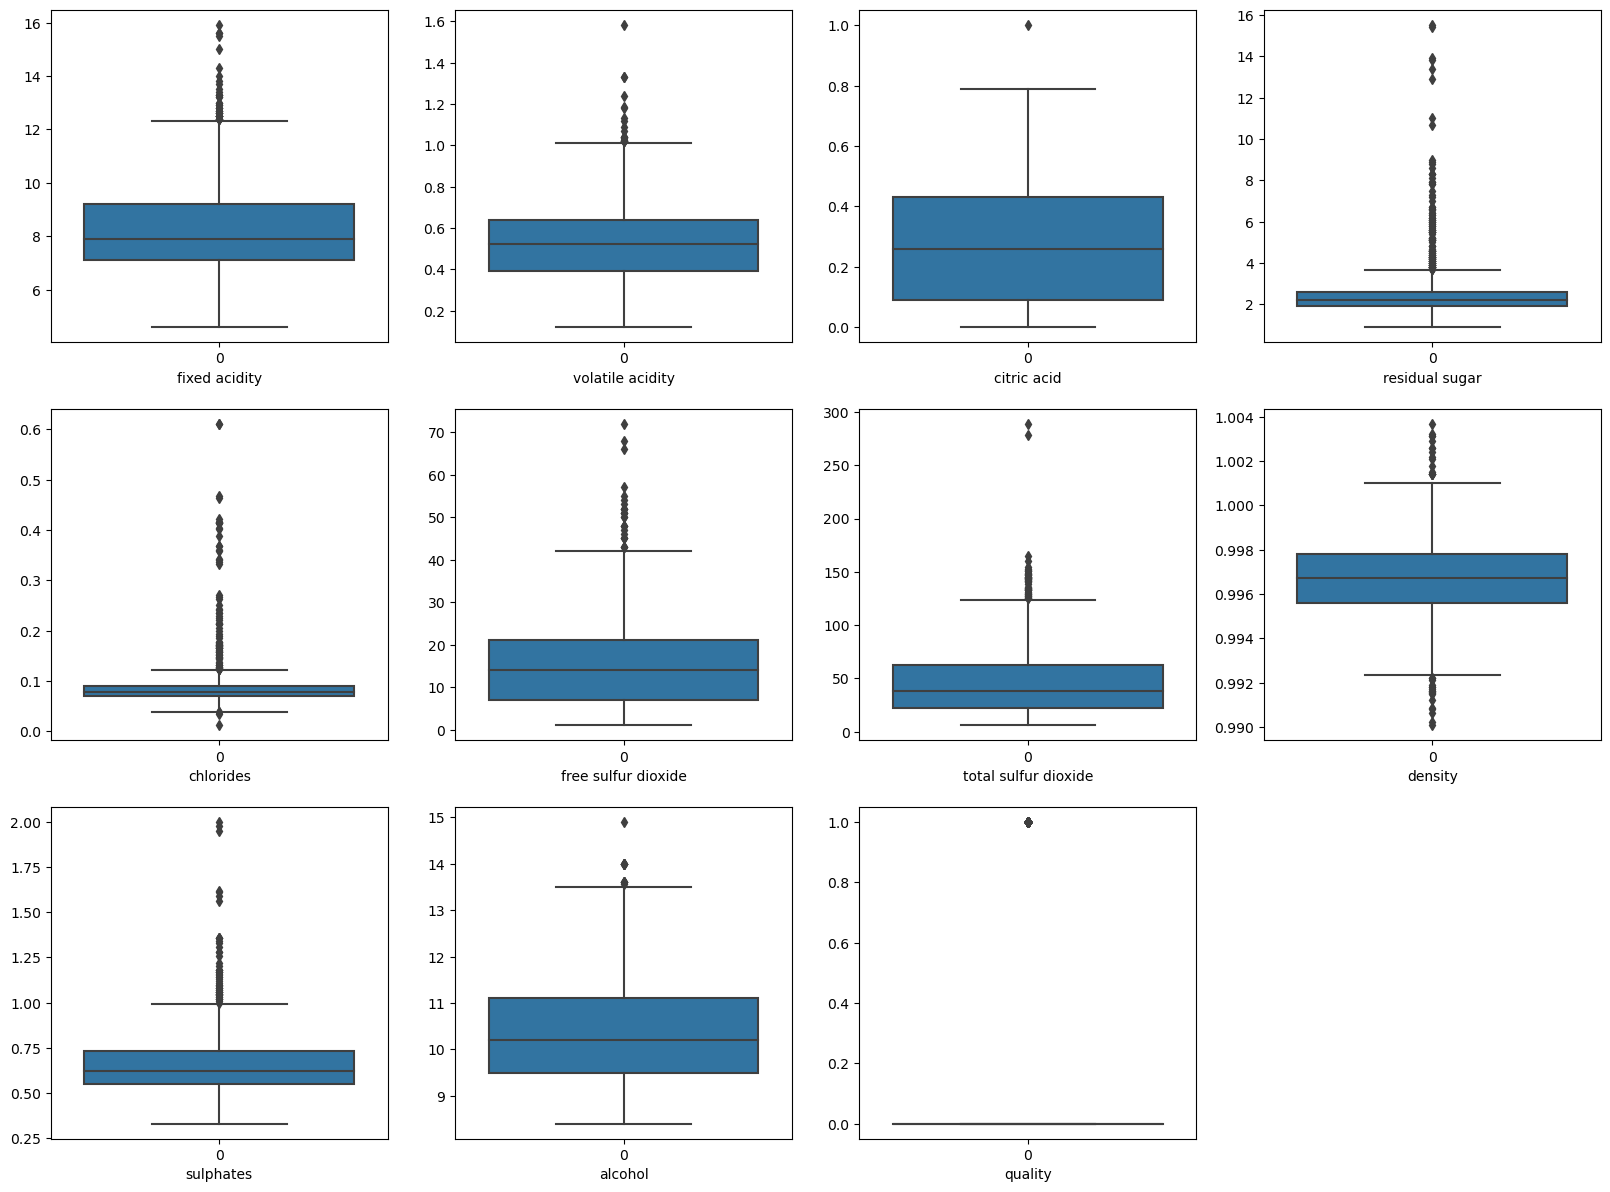

In [32]:
# checking for outliers
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
        p+=1
plt.show()   

We can clearly see the outliers present in all the columns

fixed acidity              Axes(0.125,0.786098;0.227941x0.0939024)
volatile acidity        Axes(0.398529,0.786098;0.227941x0.0939024)
citric acid             Axes(0.672059,0.786098;0.227941x0.0939024)
residual sugar             Axes(0.125,0.673415;0.227941x0.0939024)
chlorides               Axes(0.398529,0.673415;0.227941x0.0939024)
free sulfur dioxide     Axes(0.672059,0.673415;0.227941x0.0939024)
total sulfur dioxide       Axes(0.125,0.560732;0.227941x0.0939024)
density                 Axes(0.398529,0.560732;0.227941x0.0939024)
sulphates               Axes(0.672059,0.560732;0.227941x0.0939024)
alcohol                    Axes(0.125,0.448049;0.227941x0.0939024)
quality                 Axes(0.398529,0.448049;0.227941x0.0939024)
dtype: object

<Figure size 1500x2000 with 0 Axes>

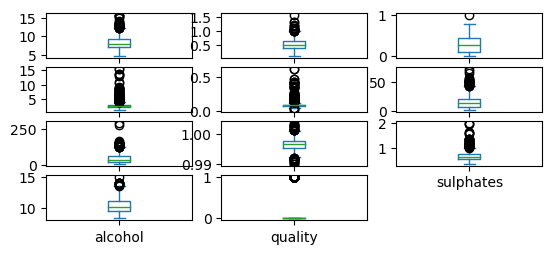

In [33]:
#checking for outliers
fig=plt.figure(figsize=(15,20))
df.plot(kind='box',subplots=True,layout=(7,3))

#Here we can see there is outlies present in all the columns and it shows the axes of rows.

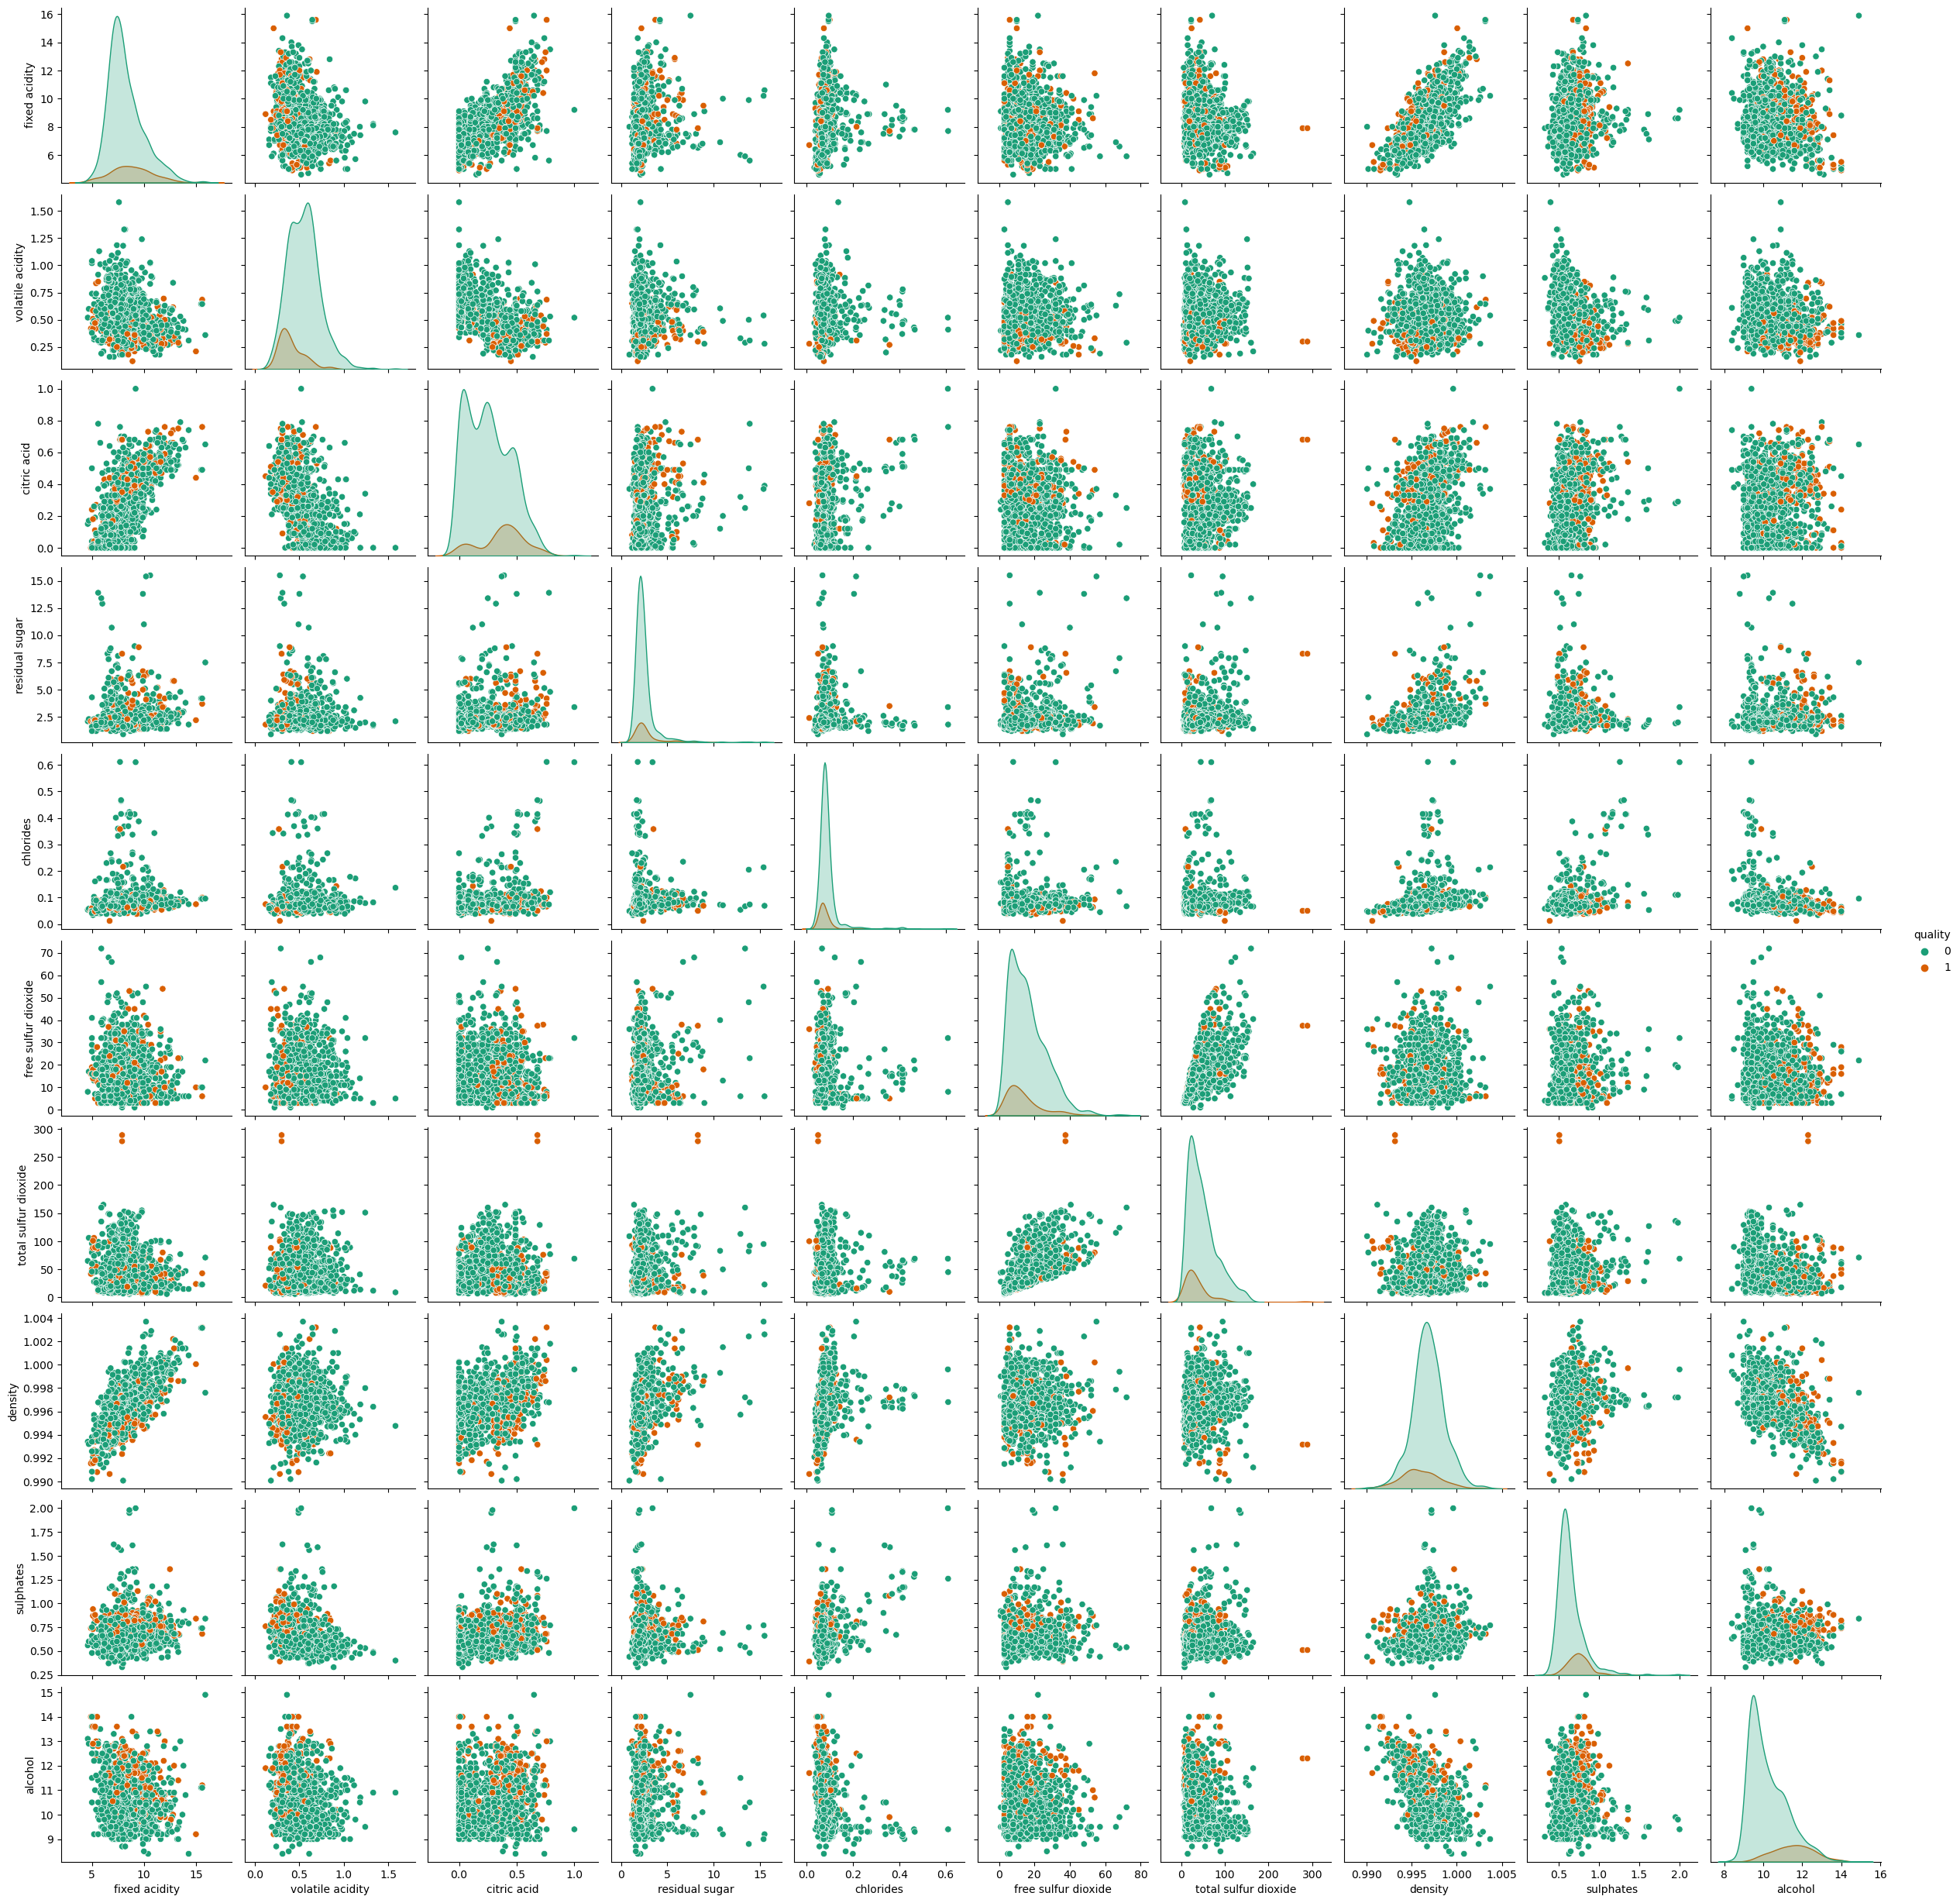

In [34]:
sns.pairplot(df,hue='quality',palette='Dark2')
plt.show()

#The pairplot gives the pairwise relation between the features on the basis of the target'quality'.
The light shades are correlated 

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV


In [36]:
dfc=df.corr()

In [37]:
dfc

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.116120         -0.267344     0.203561   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.111025   0.085886            -0.140580   
volatile acidity           -0.002449   0.055154            -0.020945   
citric acid                 0.143892   0.210195            -0.048004   
residual sugar              1.000000   0.026656             0.160527   
chlorides                   0.026656   1.000000             0.000749   
free sulfur dioxide         0.160527   0.000749             1.000000   
total sulfur dioxide        0.201038   0.045773             0.667246   
density                     0.324522   0.193592            -0.018071   
sulphates                  -0.011837   0.394557             0.054126   
alcohol                     0.063281  -0.223824            -0.080125   
quality                     0.052811  -0.096806            -0.072771   

                      total sulfur dioxide   density  sulphates   alcohol  \
fixed acidity                    -0.103777  0.670195   0.190269 -0.061596   
volatile acidity                  0.071701  0.023943  -0.256948 -0.197812   
citric acid                       0.047358  0.357962   0.326062  0.105108   
residual sugar                    0.201038  0.324522  -0.011837  0.063281   
chlorides                         0.045773  0.193592   0.394557 -0.223824   
free sulfur dioxide               0.667246 -0.018071   0.054126 -0.080125   
total sulfur dioxide              1.000000  0.078141   0.035291 -0.217829   
density                           0.078141  1.000000   0.146036 -0.504995   
sulphates                         0.035291  0.146036   1.000000  0.091621   
alcohol                          -0.217829 -0.504995   0.091621  1.000000   
quality                          -0.135877 -0.158052   0.201551  0.409926   

                       quality  
fixed acidity         0.116120  
volatile acidity     -0.267344  
citric acid           0.203561  
residual sugar        0.052811  
chlorides            -0.096806  
free sulfur dioxide  -0.072771  
total sulfur dioxide -0.135877  
density              -0.158052  
sulphates             0.201551  
alcohol               0.409926  
quality               1.000000

This shows the correlation between dependent and independent variables.We can see this by heatmap.

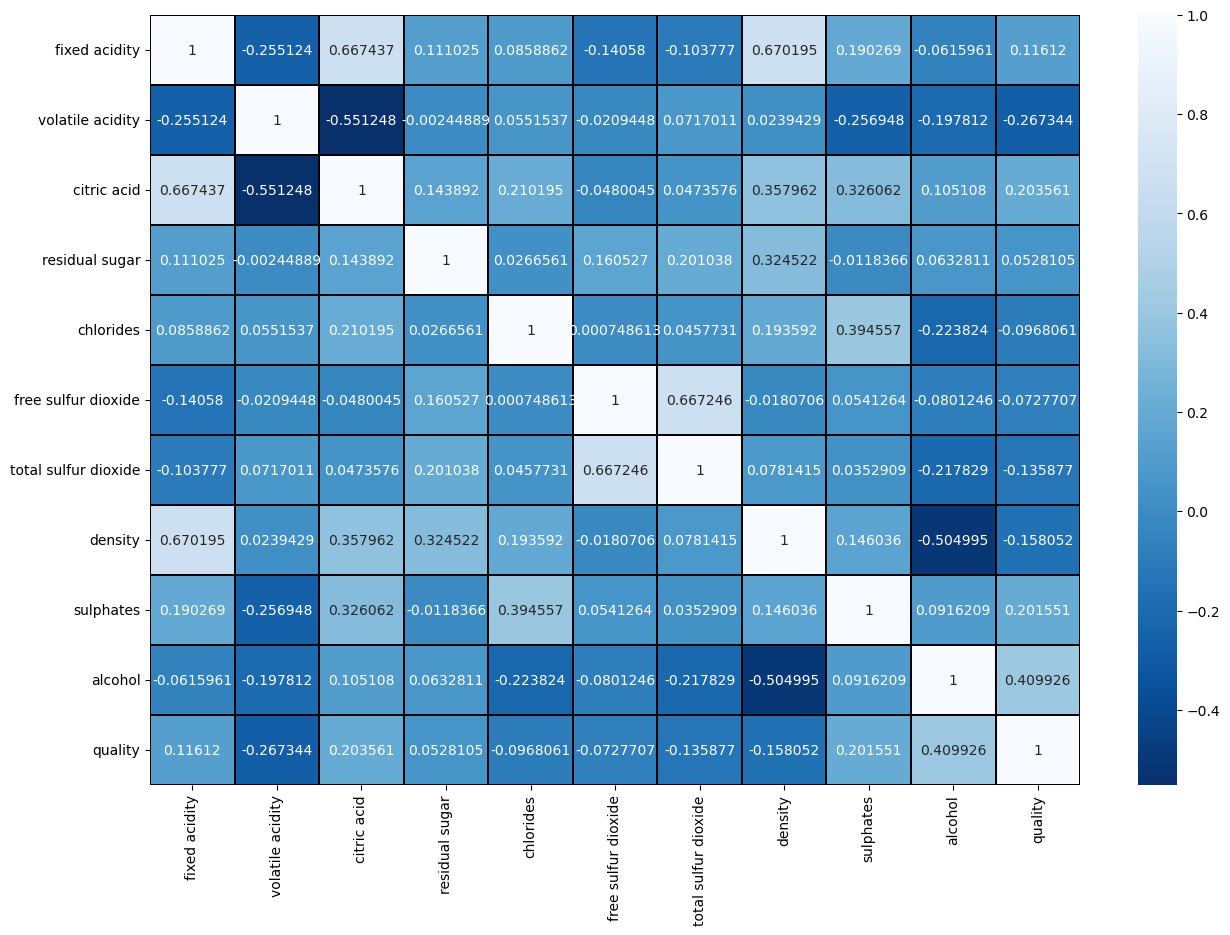

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=0.1,fmt='1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0);
plt.show()

This is the correlation visualization chart after dropping the ph column.

In [39]:
#checking skewness
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
sulphates               2.406505
alcohol                 0.859841
quality                 2.133662
dtype: float64

In [41]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [42]:
#removing skewness
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [43]:
x.skew()

fixed acidity           0.411520
volatile acidity        0.331421
citric acid             0.312726
residual sugar          2.217472
chlorides               4.927737
free sulfur dioxide    -0.090901
total sulfur dioxide   -0.035459
density                 0.044778
sulphates               1.629700
alcohol                 0.679095
dtype: float64

In [44]:
x['chlorides']=np.cbrt(x['chlorides'])
x['residual sugar']=np.cbrt(x['residual sugar'])

In [45]:
x.skew()

fixed acidity           0.411520
volatile acidity        0.331421
citric acid             0.312726
residual sugar          1.548544
chlorides               2.776443
free sulfur dioxide    -0.090901
total sulfur dioxide   -0.035459
density                 0.044778
sulphates               1.629700
alcohol                 0.679095
dtype: float64

This is after removing the skewness

In [47]:
#seperating independent and target variables
x=df.drop('quality',axis=1)
y=df['quality']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (1359, 10)
label dimension (1359,)


In [48]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[-0.52443096,  0.93200015, -1.39325797, ...,  0.58400336,
        -0.57856134, -0.95437429],
       [-0.29406274,  1.91580043, -1.39325797, ...,  0.04873719,
         0.12482157, -0.5845748 ],
       [-0.29406274,  1.25993358, -1.18861732, ...,  0.15579042,
        -0.05102416, -0.5845748 ],
       ...,
       [-1.38831178,  0.11216658, -0.88165635, ..., -0.85050998,
         0.59374351,  0.7097234 ],
       [-1.38831178,  0.63139451, -0.77933603, ..., -0.66316682,
         0.3006673 , -0.21477532],
       [-1.33071973, -1.19956712,  1.01126962, ..., -0.6524615 ,
         0.00759108,  0.52482366]])

# model buliding

In [49]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    ra=RandomForestClassifier()
    ra.fit(x_train,y_train)
    pre=ra.predict(x_test)
    acc=accuracy_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        
    

Best accuracy 0.9117647058823529 at random state 77


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [51]:
#DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.8676470588235294
[[334  25]
 [ 29  20]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       359
           1       0.44      0.41      0.43        49

    accuracy                           0.87       408
   macro avg       0.68      0.67      0.68       408
weighted avg       0.86      0.87      0.87       408



the accuracy score od Decision tree classifier is 84.75%

In [52]:
# Random forest classifier
Rc=RandomForestClassifier()
Rc.fit(x_train,y_train)
preRc=Rc.predict(x_test)
print(accuracy_score(y_test,preRc))
print(confusion_matrix(y_test,preRc))
print(classification_report(y_test,preRc))

0.9117647058823529
[[351   8]
 [ 28  21]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       359
           1       0.72      0.43      0.54        49

    accuracy                           0.91       408
   macro avg       0.83      0.70      0.74       408
weighted avg       0.90      0.91      0.90       408



The accuracy score of Randomforest is 89.30%

In [53]:
# Logistic regression
lg=LogisticRegression()
lg.fit(x_train,y_train)
prelg=lg.predict(x_test)
print(accuracy_score(y_test,prelg))
print(confusion_matrix(y_test,prelg))
print(classification_report(y_test,prelg))

0.9044117647058824
[[350   9]
 [ 30  19]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       359
           1       0.68      0.39      0.49        49

    accuracy                           0.90       408
   macro avg       0.80      0.68      0.72       408
weighted avg       0.89      0.90      0.89       408



The accuracy score of Logistic regression is 89.83%

In [54]:
#Support vector machine
svc=SVC()
svc.fit(x_train,y_train)
presvc=svc.predict(x_test)
print(accuracy_score(y_test,presvc))
print(confusion_matrix(y_test,presvc))
print(classification_report(y_test,presvc))

0.9044117647058824
[[353   6]
 [ 33  16]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       359
           1       0.73      0.33      0.45        49

    accuracy                           0.90       408
   macro avg       0.82      0.65      0.70       408
weighted avg       0.89      0.90      0.89       408



The accuracy score of support vector machine is 89.83%

In [55]:
# Ada boost classifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
preada=ada.predict(x_test)
print(accuracy_score(y_test,preada))
print(confusion_matrix(y_test,preada))
print(classification_report(y_test,preada))

0.8897058823529411
[[346  13]
 [ 32  17]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       359
           1       0.57      0.35      0.43        49

    accuracy                           0.89       408
   macro avg       0.74      0.66      0.68       408
weighted avg       0.87      0.89      0.88       408



The accuracy score of AdaBoost classifier is 89.03%

In [56]:
# Extra tree classifier
ex=ExtraTreesClassifier()
ex.fit(x_train,y_train)
preada=ex.predict(x_test)
print(accuracy_score(y_test,preada))
print(confusion_matrix(y_test,preada))
print(classification_report(y_test,preada))

0.8897058823529411
[[348  11]
 [ 34  15]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       359
           1       0.58      0.31      0.40        49

    accuracy                           0.89       408
   macro avg       0.74      0.64      0.67       408
weighted avg       0.87      0.89      0.87       408



The accuracy score of Extratrees classifier is 90.64%

# checking the cross validation

In [57]:
# Cv score for decisiontree
score= cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracu score and cross validation',accuracy_score(y_test,preddtc)-score.mean())

[0.87132353 0.81617647 0.85661765 0.75       0.85239852]
0.8293032342088127
0.043603875165561884
difference between accuracu score and cross validation 0.03834382461471675


cross validation score of Decisiontree Classifier is 0.8225670682730923

In [58]:
# Cv score for randomforest
score= cross_val_score(Rc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,preRc)-score.mean())

[0.87867647 0.84926471 0.86764706 0.84558824 0.88560886]
0.8653570653353594
0.015764240096762836
difference between accuracy score and corss validation 0.046407640546993534


cross validation score of randomforest is 0.862740562248996

In [59]:
# Cv score for logistic regression
score= cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,prelg)-score.mean())

[0.86397059 0.85294118 0.88235294 0.83088235 0.88929889]
0.8638891903624918
0.020956526582584543
difference between accuracy score and corss validation 0.04052257434339057


cross validation score of logistic regression is 0.8707855421686748

In [60]:
# Cv score for support vector machine
score= cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,presvc)-score.mean())

[0.875      0.84558824 0.89705882 0.875      0.87084871]
0.8726991534621229
0.016385404150565306
difference between accuracy score and cross validation 0.03171261124375946


cross validation score of svc is 0.883627309236948

In [61]:
# Cv score for ada boost classifier
score= cross_val_score(ada,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,preada)-score.mean())

[0.89338235 0.80882353 0.88970588 0.82352941 0.86346863]
0.855781962231387
0.034260846737502106
difference between accuracy score and cross validation 0.033923920121554096


cross validation score of adaBoost is 0.8563116465863454

In [62]:
# Cv score for Extatrees classifier
score= cross_val_score(ex,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,preada)-score.mean())

[0.87867647 0.83823529 0.88235294 0.83823529 0.88191882]
0.8638837638376383
0.020980399920089886
difference between accuracy score and cross validation 0.025822118515302805


cross validation score of extratrees classifier is 0.8699726907630522

SupportVector Machine is our best model as the difference between accuracy score and cross validation score is least

# Setting paramaters

In [63]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [64]:
para={'C':[0.8,0.9,1,1.1,1.2,1.3,1.4],
      'kernel':['rbf','linear','poly']}
svc_cv=GridSearchCV(svc,para,cv=10)
svc_cv.fit(x_train,y_train)
print(svc_cv.best_params_)

{'C': 1, 'kernel': 'rbf'}


In [65]:
svc_new=SVC(C=1.3,kernel='rbf',random_state=2020)
svc_new.fit(x_train,y_train)
y_pred_new=svc_new.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred_new))
print(acc*100)

0.9044117647058824
87.00980392156863


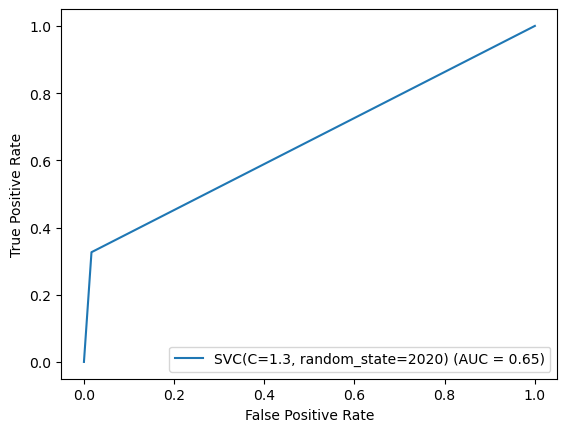

In [66]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_new)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=svc_new)
display.plot()

Here we have plotted the ROC curve for yhe model and the Auc value of the best model is 67%

In [67]:
#Saving the model
import joblib
import pickle
filename="Wine_quality.pkl"
pickle.dump(svc_new,open(filename,'wb'))

In [68]:
#predicting the save model
model=pickle.load(open('Wine_quality.pkl','rb'))

In [69]:
result=model.score(x_test,y_test)
print(result*100)

90.44117647058823


In [70]:
con=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

0    1    2    3    4    5    6    7    8    9    ...  398  399  \
predicted    0    0    0    0    0    0    0    0    0    0  ...    0    0   
orginal      0    0    0    0    0    0    0    1    0    0  ...    1    0   

           400  401  402  403  404  405  406  407  
predicted    0    0    0    0    0    0    0    0  
orginal      0    0    0    0    0    0    0    0  

[2 rows x 408 columns]